In [3]:
import pandas as pd #importing libraries
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
#This dataset includes greenhouse gas emissions in the early years by measuring carbon dioxide in the ice.

In [4]:
df = pd.read_csv("merged_ice_core_yearly.csv", sep=',') #reading dataframe, 
df.columns = ['Date', 'CO2']
#df['Date'] = df['Date'].astype(float).apply(np.ceil).astype(int) -Update the dataset
#df['CO2'] = df['CO2'].astype(float)
df.head()

,Date,CO2
0,14,276.75
1,30,277.88
2,56,277.38
3,105,277.51
4,136,278.13


In [5]:
df = df.loc[df['Date'] > 1600] #Narrowing the dataset after 1600 to more easily see the 
#greenhouse gas effect after the industrial revolution.
x = df['Date']
y = df['CO2']
p = np.polyfit(x,y,5) #fitting a polynomical function to the datasets plot.
f = np.polyval(p,x)

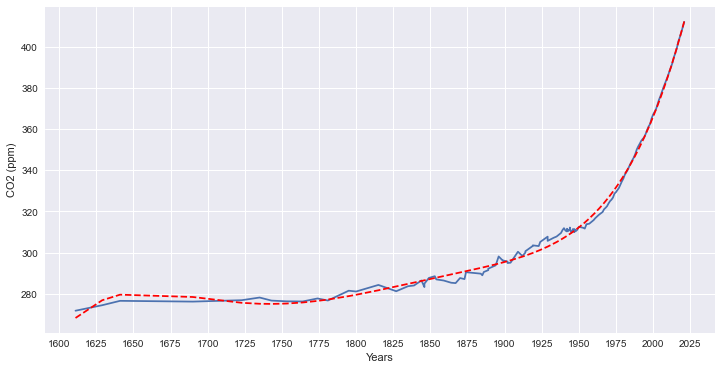

In [13]:
fig, ax = plt.subplots(figsize=(12, 6)) #defining the size of the plot.
ax.plot(df['Date'], df['CO2'])
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Years')
ax.set_xticks(np.arange(1600,2026,25))
ax.plot(x,f,'r--')
plt.show()

In [7]:
#predict the greenhouse gas emission in 2100 by using a polynomical function.
x2 = np.arange(2020,2100,5) #declaring the prediction years and the gap between the years.
f2 = np.polyval(p,x2)
pred = list(zip(x2, f2))  
df2 = pd.DataFrame(pred, columns=['Date', 'CO2'])
pred_df = df.append(df2, ignore_index=True) #creating another prediction dataframe.
pred_df.tail()

,Date,CO2
152,2075,654.412989
153,2080,689.454937
154,2085,727.221227
155,2090,767.867923
156,2095,811.556784


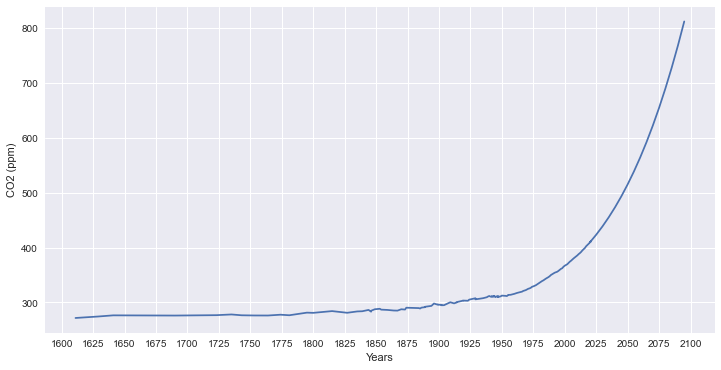

In [8]:
fig, ax = plt.subplots(figsize=(12, 6)) #defining the size of the plot.
ax.plot(pred_df['Date'], pred_df['CO2'])
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Years')
ax.set_xticks(np.arange(1600,2101,25)) #declaring the years and gaps to see our prediction.
plt.show()
#below is our prediction plot.

In [9]:
df3 = pd.read_csv("spline_merged_ice_core_yearly.csv", sep=', ', engine='python').replace('"','', regex=True) #reading dataframe
df3.columns = ['Date', 'CO2']
df3['Date'] = df3['Date'].astype(float).apply(np.ceil).astype(int)
df3['CO2'] = df3['CO2'].astype(float)
df3.head()

,Date,CO2
0,1,275.92
1,2,275.98
2,3,276.03
3,4,276.10
4,5,276.16


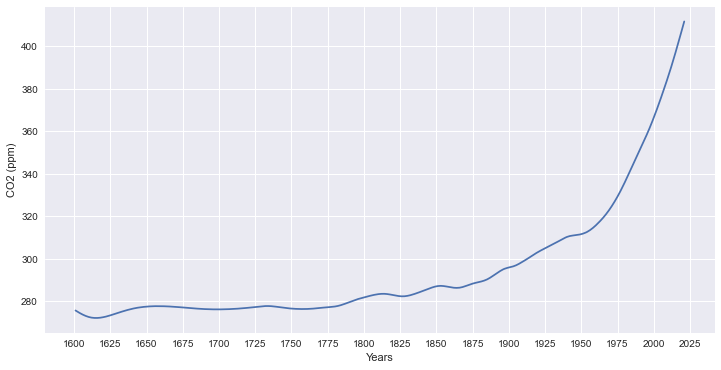

In [10]:
df3 = df3.loc[df3['Date'] > 1600]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df3['Date'], df3['CO2'])
ax.set_ylabel('CO2 (ppm)')
ax.set_xlabel('Years')
ax.set_xticks(np.arange(1600,2026,25))
plt.show()